In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from goss import SimpleGOSS
from gbdt import SimpleGBDT
from efb import SimpleEFB

In [5]:
data = pd.read_csv("./data/boston.csv")
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
## GBDT

params = {'n_estimators': [50, 70, 100, 150, 200, 300],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'max_depth': list(np.arange(3, 10)),
          'max_bin': [5, 10, 20, 50, 100, 255],
          }
grid = ParameterGrid(params)

best_score = 10000
best_param = None

total = len(grid)
for i, param in enumerate(grid):
    if i % 100 == 0:
        print(f'{i+1}/{total}')
    model = SimpleGBDT(**param)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred_test)

    if score < best_score:
        best_score = score
        best_param = param

print(best_score)
print(best_param)

1/1260
101/1260
201/1260
301/1260
401/1260
501/1260
601/1260
701/1260
801/1260
901/1260
1001/1260
1101/1260
1201/1260


In [36]:
model = SimpleGOSS(n_trees=50, learning_rate=0.05, a=0.3, b=0.1, max_depth=8, random_state=42, max_bin=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

16.46282935409331

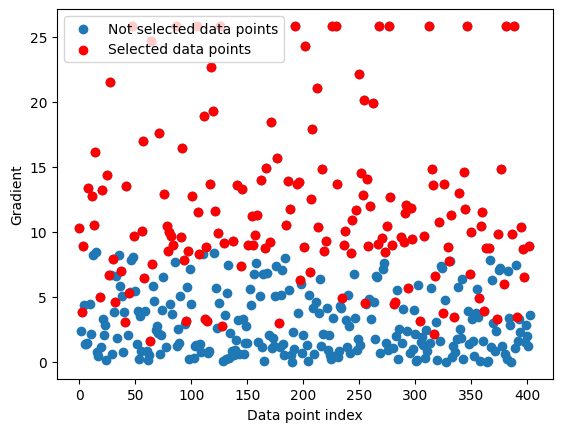

In [37]:
model.plot_grad_with_iter(1)

In [ ]:
## GOSS

params = {'n_trees': [50, 70, 100, 150, 200, 300],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'a': [0.1, 0.2, 0.3, 0.4],
          'b': [0.1, 0.2, 0.3, 0.4],
          'max_depth': list(np.arange(3, 10)),
          'max_bin': [5, 10, 20, 50, 100, 255],
          }
grid = ParameterGrid(params)

best_score = 10000
best_param = None

total = len(grid)
for i, param in enumerate(grid):
    if i % 100 == 0:
        print(f'{i+1}/{total}')
    model = SimpleGOSS(**param)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred_test)

    if score < best_score:
        best_score = score
        best_param = param

print(best_score)
print(best_param)

In [35]:
model = SimpleGOSS(n_trees=500, learning_rate=0.01, a=0.1, b=0.1, max_depth=8, random_state=42, max_bin=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

23.112751996462368

In [ ]:
## EFB

params = {'n_trees': [50, 70, 100, 150, 200, 300],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'max_depth': list(np.arange(3, 10)),
          'max_bin': [5, 10, 20, 50, 100, 255],
          }
grid = ParameterGrid(params)

best_score = 10000
best_param = None

total = len(grid)
for i, param in enumerate(grid):
    if i % 100 == 0:
        print(f'{i+1}/{total}')
    model = SimpleEFB(**param)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred_test)

    if score < best_score:
        best_score = score
        best_param = param

print(best_score)
print(best_param)

In [34]:
model = SimpleEFB(n_trees=200, learning_rate=0.01, max_depth=7, random_state=42, max_bin=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

17.761520542291155